# Otimização por Múltiplos Enxames Aplicada ao Escalonamento Dinâmico de Projetos de Software


### QP1. Qual a influência do tamanho dos enxames no desempenho de um algoritmo multiswarm?

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

from dspsp_analysis import (algorithm_dataset, instance_dataset, comparison_dataset, 
                            max_event, metrics_dataset, mean_hypervolume, median_hypervolume)

%matplotlib inline

data = metrics_dataset(filepath="../hypervolume/metrics-rq1-swarm-size.csv")
instance_ids = list(data.instance.unique())
algorithm_ids = list(data.algorithm.unique())

In [8]:
instance_datasets = {}
for inst in instance_ids:
    ds = instance_dataset(data, inst, zero_values=True)
    instance_datasets[inst] = {alg: algorithm_dataset(ds, alg, zero_values=True) for alg in algorithm_ids}
    
comparison_datasets = {}
for inst in instance_ids:
    comparison_datasets[inst] = {alg: comparison_dataset(instance_datasets[inst][alg]) for alg in algorithm_ids}

for inst in instance_ids:
    min_event = min([max_event(ds) for ds in comparison_datasets[inst].values()])
    for k in comparison_datasets[inst].keys():
        comparison_datasets[inst][k] = comparison_datasets[inst][k][:min_event+1]
        
cmp_poucos = comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MO-5s200p"]
cmp_muitos = comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MO-30s60p"]

s, p = wilcoxon(cmp_poucos.hypervolume, cmp_muitos.hypervolume)

if (p <= 0.05):
    print("p-value = ", p, "Há diferença significativa!")
else:
    print("p-value = ", p, "Não há diferença significativa.")

p-value =  0.3132934055389275 Não há diferença significativa.


In [9]:
instance_datasets = {}
for inst in instance_ids:
    ds = instance_dataset(data, inst, zero_values=False)
    instance_datasets[inst] = {alg: algorithm_dataset(ds, alg, zero_values=False) for alg in algorithm_ids}

poucos = instance_datasets["ST10_DT10_E5_SK4-5"]["MS2MO-5s200p"]
muitos = instance_datasets["ST10_DT10_E5_SK4-5"]["MS2MO-30s60p"]

rq1_data = pd.concat([poucos, muitos])

median_hypervolume(rq1_data)

,instance,algorithm,hypervolume
0,ST10_DT10_E5_SK4-5,MS2MO-30s60p,1.077582
1,ST10_DT10_E5_SK4-5,MS2MO-5s200p,1.082876


In [10]:
n_poucos = cmp_poucos.hypervolume.count()
n_muitos = cmp_muitos.hypervolume.count()
z_poucos = cmp_poucos[cmp_poucos.hypervolume == 0].hypervolume.count()
z_muitos = cmp_muitos[cmp_muitos.hypervolume == 0].hypervolume.count()
print("MS2MO-5s200p:", z_poucos, "/", n_poucos, "(", z_poucos / n_poucos,")")
print("MS2MO-30s60p:", z_muitos, "/", n_muitos, "(", z_muitos / n_muitos,")")
print((z_muitos / n_muitos) / (z_poucos / n_poucos), (z_poucos / n_poucos) / (z_poucos / n_poucos))

MS2MO-5s200p: 38 / 166 ( 0.2289156626506024 )
MS2MO-30s60p: 39 / 166 ( 0.23493975903614459 )
1.0263157894736843 1.0


#### Gráficos comparativos

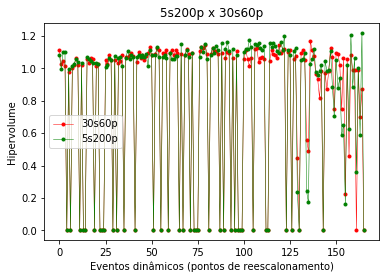

In [11]:
plt.title("5s200p x 30s60p")
plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
plt.plot(comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MO-30s60p"].event, comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MO-30s60p"].hypervolume, "-ro", markersize=3, lw=.5, label="30s60p")
plt.plot(comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MO-5s200p"].event, comparison_datasets["ST10_DT10_E5_SK4-5"]["MS2MO-5s200p"].hypervolume, "-go", markersize=3, lw=.5, label="5s200p")
plt.legend()
plt.show()

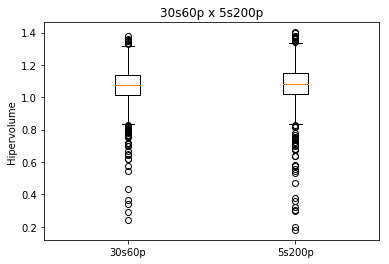

In [12]:
plt.title("30s60p x 5s200p")
# plt.xlabel("Eventos dinâmicos (pontos de reescalonamento)")
plt.ylabel("Hipervolume")
# plt.boxplot(comparison_datasets["ST30_DT10_E15_SK6-7"]["MS2MO-30s60p"].hypervolume, 0)
# plt.figure()
plt.boxplot([muitos.hypervolume, poucos.hypervolume], labels=["30s60p", "5s200p"])
# plt.legend()
plt.show()